<a href="https://colab.research.google.com/github/lungnahahd/Tensorflow_Prac/blob/main/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [4]:
from sklearn.decomposition import PCA

# 300개의 벡터(10,000차원)에서 n_components 개의 principal components를 구한다.
n_components = 50

pca = PCA(n_components = n_components)
pca.fit(fruits_2d)
print(pca.components_.shape)

(50, 10000)


In [5]:
import matplotlib.pyplot as plt       # 그래프를 그리기 위해 불러온다.

# 이미지를 10개씩 100개를 그리는 함수
def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

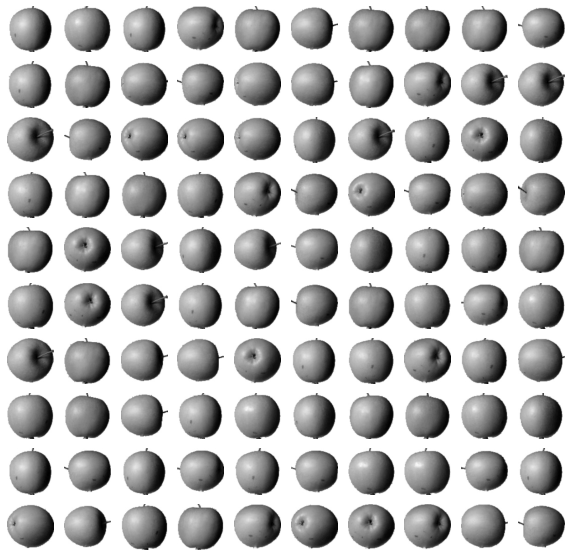

/n


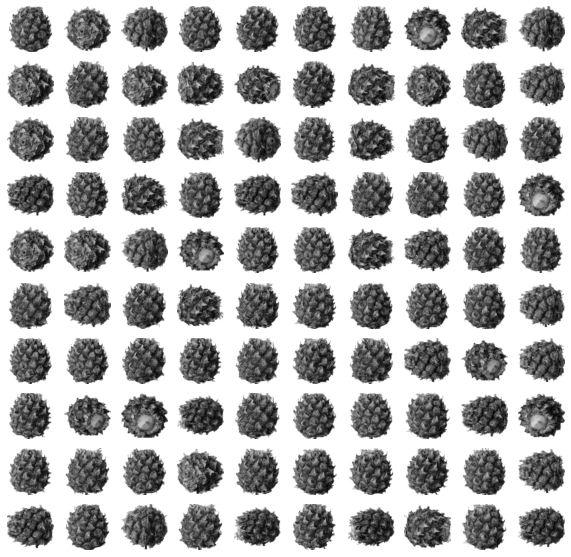

/n


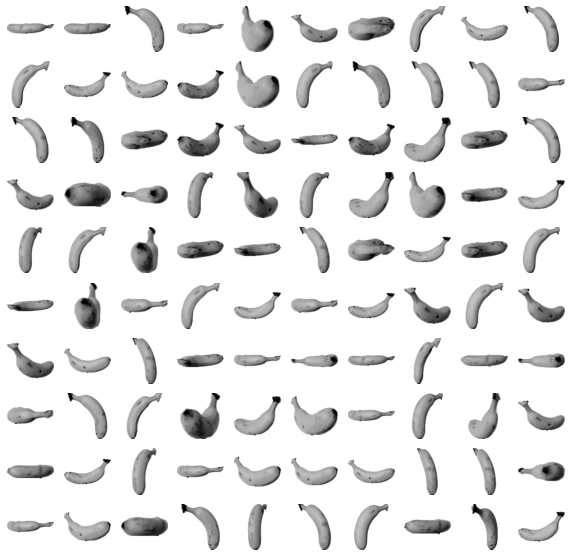

/n


In [6]:
# 원본 과일 이미지를 그린다.

for start in [0, 100, 200]:
    draw_fruits(fruits[start:start+100])
    print("/n")

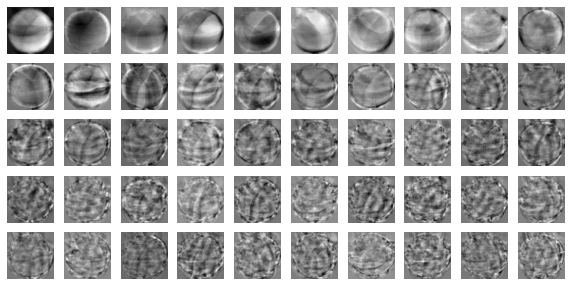

In [ ]:
# n_components 개의 principal components를 이미지로 변환하여 그려본다.

draw_fruits(pca.components_.reshape(-1, 100, 100))

In [8]:
print(fruits_2d.shape)

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


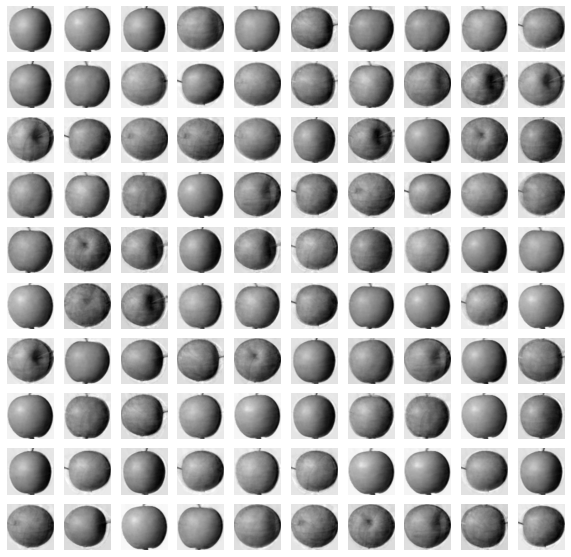

/n


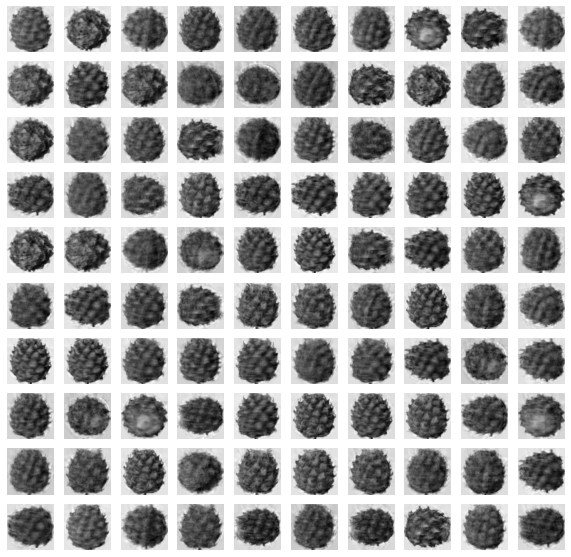

/n


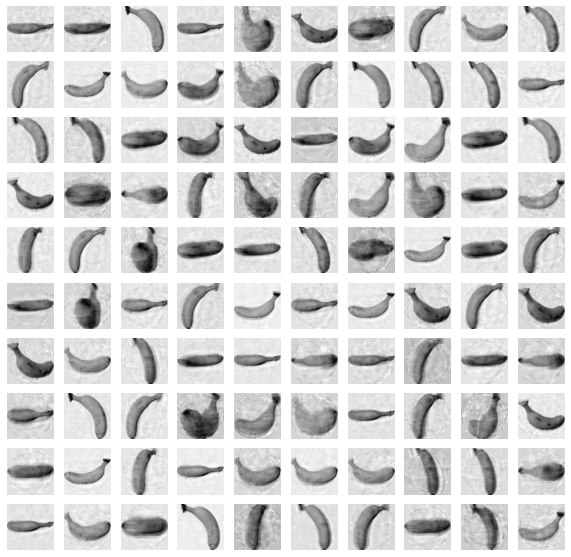

/n


In [9]:
# 50개의 principal components(basis vectors)로 합성해본다.

fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("/n")

In [10]:
# Eigenvalues corresponding to the principal components.
print(pca.explained_variance_ratio_.shape)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

(50,)
[0.42357017 0.09941755 0.06577863 0.04031172 0.03416875 0.03281329
 0.02573267 0.02054963 0.01372276 0.01342773 0.01152146 0.00944596
 0.00878232 0.00846697 0.00693049 0.00645188 0.00578895 0.00511199
 0.00486383 0.00480347 0.00447837 0.00437316 0.00408038 0.00389477
 0.00372429 0.00359287 0.00331476 0.00317831 0.00304316 0.00303749
 0.00288926 0.00275874 0.00264721 0.00255863 0.0025199  0.00246464
 0.00239351 0.00230967 0.00221536 0.00216706 0.00213871 0.00196142
 0.00192785 0.00190068 0.00185488 0.00182964 0.00173288 0.00168553
 0.00161775 0.00159728]
0.9215484028031982


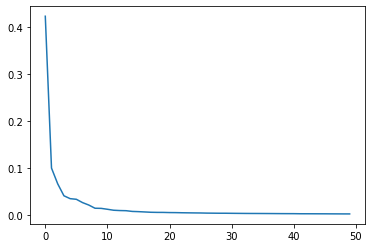

In [11]:
plt.plot(pca.explained_variance_ratio_)

In [12]:
from sklearn.cluster import KMeans

# kmeans 알고리즘으로 clustering 수행해본다.

km = KMeans(n_clusters=3)
km.fit(fruits_pca)

print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 98,  91, 111]))


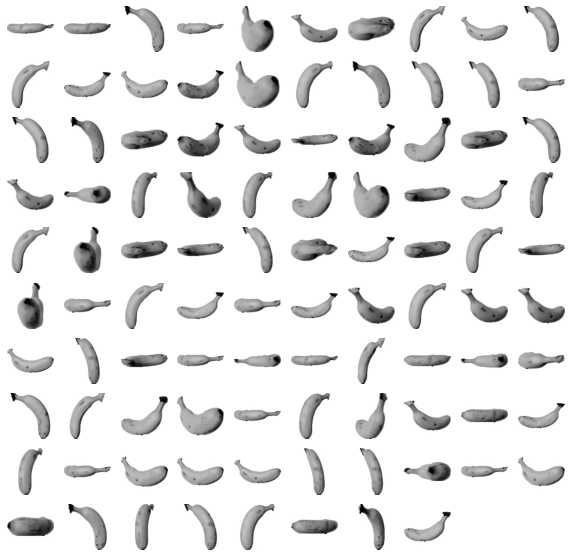

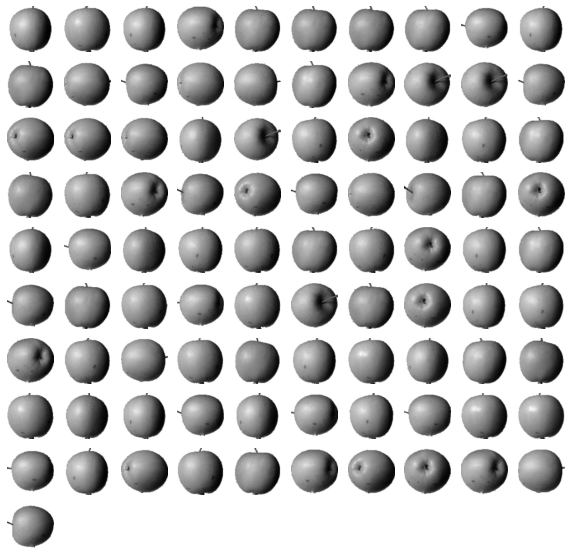

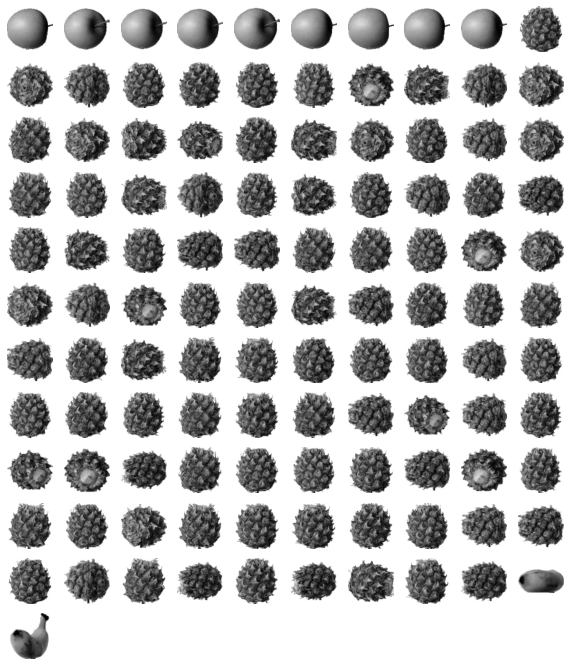

In [13]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

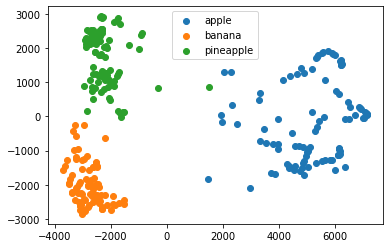

In [14]:

for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()